In [1]:
import gc
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

import random
random.seed(42)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
d = pd.read_csv('/Users/mastermind/pubg-finish-placement-prediction/train_V2.csv')

In [4]:
t = pd.read_csv('/Users/mastermind/Downloads/test_V2.csv')

In [5]:
d.append(t)

/Users/mastermind/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,DBNOs,Id,assists,boosts,damageDealt,groupId,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints
0,0,7f96b2f878858a,0,0,0.000,4d4b580de459be,0,0,60,1241,...,0,0.0000,0,0.000,0,0,244.800,1,0.4444,1466
1,0,eef90569b9d03c,0,0,91.470,684d5656442f9e,0,0,57,0,...,0,0.0045,0,11.040,0,0,1434.000,5,0.6400,0
2,0,1eaf90ac73de72,1,0,68.000,6a4a42c3245a74,0,0,47,0,...,0,0.0000,0,0.000,0,0,161.800,2,0.7755,0
3,0,4616d365dd2853,0,0,32.900,a930a9c79cd721,0,0,75,0,...,0,0.0000,0,0.000,0,0,202.700,3,0.1667,0
4,0,315c96c26c9aac,0,0,100.000,de04010b3458dd,0,0,45,0,...,0,0.0000,0,0.000,0,0,49.750,2,0.1875,0
5,1,ff79c12f326506,0,0,100.000,289a6836a88d27,1,0,44,0,...,0,0.0000,0,0.000,0,0,34.700,1,0.0370,0
6,0,95959be0e21ca3,0,0,0.000,2c485a1ad3d0f1,0,0,96,1262,...,0,0.0000,0,0.000,0,0,13.500,1,0.0000,1497
7,0,311b84c6ff4390,0,0,8.538,eaba5fcb7fc1ae,0,0,48,1000,...,0,2004.0000,0,0.000,0,0,1089.000,6,0.7368,1500
8,0,1a68204ccf9891,0,0,51.600,47cfbb04e1b1a2,0,0,64,0,...,0,0.0000,0,0.000,0,0,799.900,4,0.3704,0
9,0,e5bb5a43587253,0,0,37.270,759bb6f7514fd2,0,0,74,0,...,0,0.0000,0,0.000,0,0,65.670,1,0.2143,0


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [7]:
def plot_counts(p):
    plt.figure(figsize = (20, 15))
    sns.countplot(d[p]).set_title(p)
    plt.show()

In [8]:
def plot_dists(p, b = 50, kde_flag = True, rug_flag = False):
    plt.figure(figsize = (20, 15))
    sns.distplot(d[p], kde= kde_flag, rug = rug_flag, bins = b).set_title(p)
    plt.show()

In [9]:
def plot_scatters(x, y, title):
    plt.figure(figsize = (20, 15))
    sns.scatterplot(d[x], d[y]).set_title(title)
    plt.show()

In [10]:
def heat_map(m):
    sns.heatmap(m, cmap="RdBu", linecolor='white',linewidths=0.1)
    plt.show()

In [11]:
def heat_anot(n):
    sns.heatmap(n, cmap="RdBu", linecolor='white',linewidths=0.1, annot=True)
    plt.show()

In [12]:
cols_to_drop = ['Id', 'groupId', 'matchId', 'matchType']
cols_to_fit = [col for col in d.columns if col not in cols_to_drop]

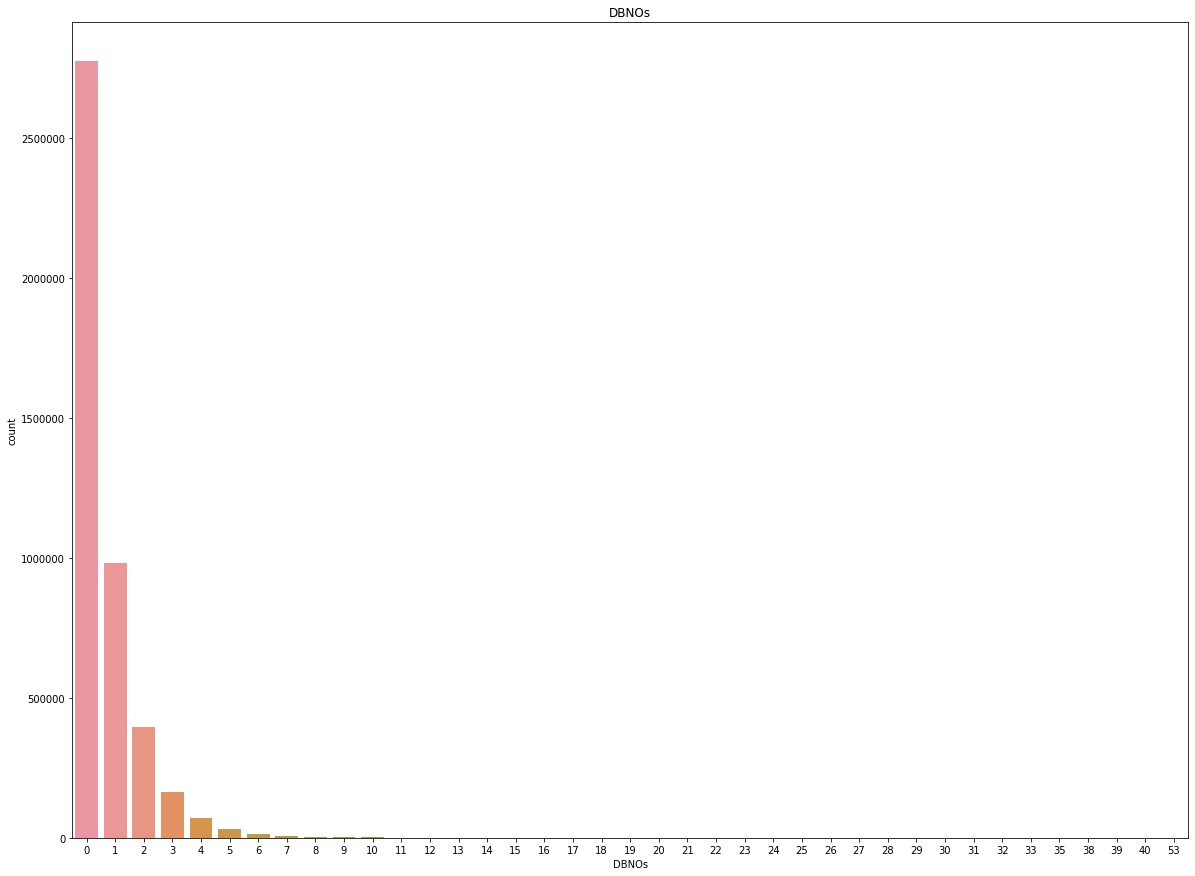

In [13]:
plot_counts("DBNOs")

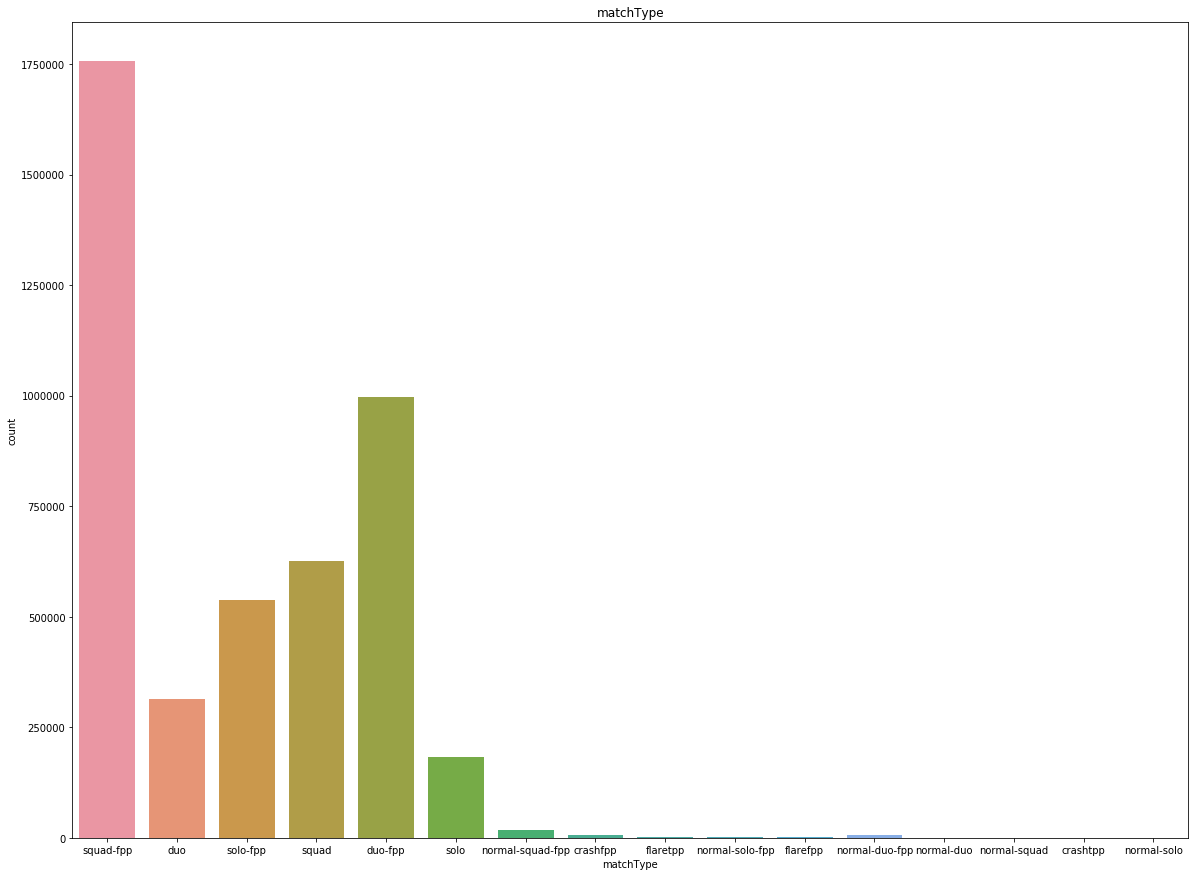

In [14]:
plot_counts("matchType")

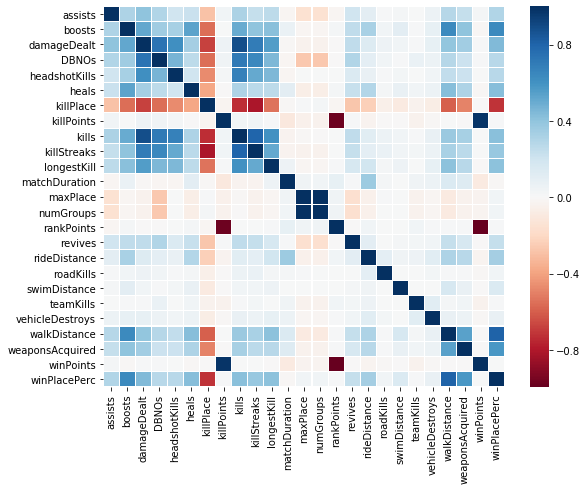

In [15]:
corr = d[cols_to_fit].corr()
plt.figure(figsize=(9,7))
heat_map(corr)

In [14]:
d['headshotKills_over_kills'] = d['headshotKills'] / d['kills']
d['headshotKills_over_kills'].fillna(0, inplace=True)
d['revives_over_kills'] = d['revives'] / d['kills']
d['revives_over_kills'].fillna(0, inplace=True)
d['DBNO_over_kills'] = d['DBNOs'] / d['kills']
d['DBNO_over_kills'].fillna(0, inplace=True)
d['teamkills_over_kills'] = d['teamKills'] / d['kills']
d['teamkills_over_kills'].fillna(0, inplace=True)
d['walkdist_over_kills'] = d['walkDistance'] / d['kills']
d['walkdist_over_kills'].fillna(0, inplace=True)
d['killPlace_over_maxPlace'] = d['killPlace'] / d['maxPlace']
d['killPlace_over_maxPlace'].fillna(0, inplace=True)
d['teamwork'] = d['assists'] + d['revives']
d['total_distance'] = d['rideDistance'] + d['swimDistance'] + d['walkDistance']

In [15]:
d.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc',
       'headshotKills_over_kills', 'revives_over_kills', 'DBNO_over_kills',
       'teamkills_over_kills', 'walkdist_over_kills',
       'killPlace_over_maxPlace', 'teamwork', 'total_distance'],
      dtype='object')

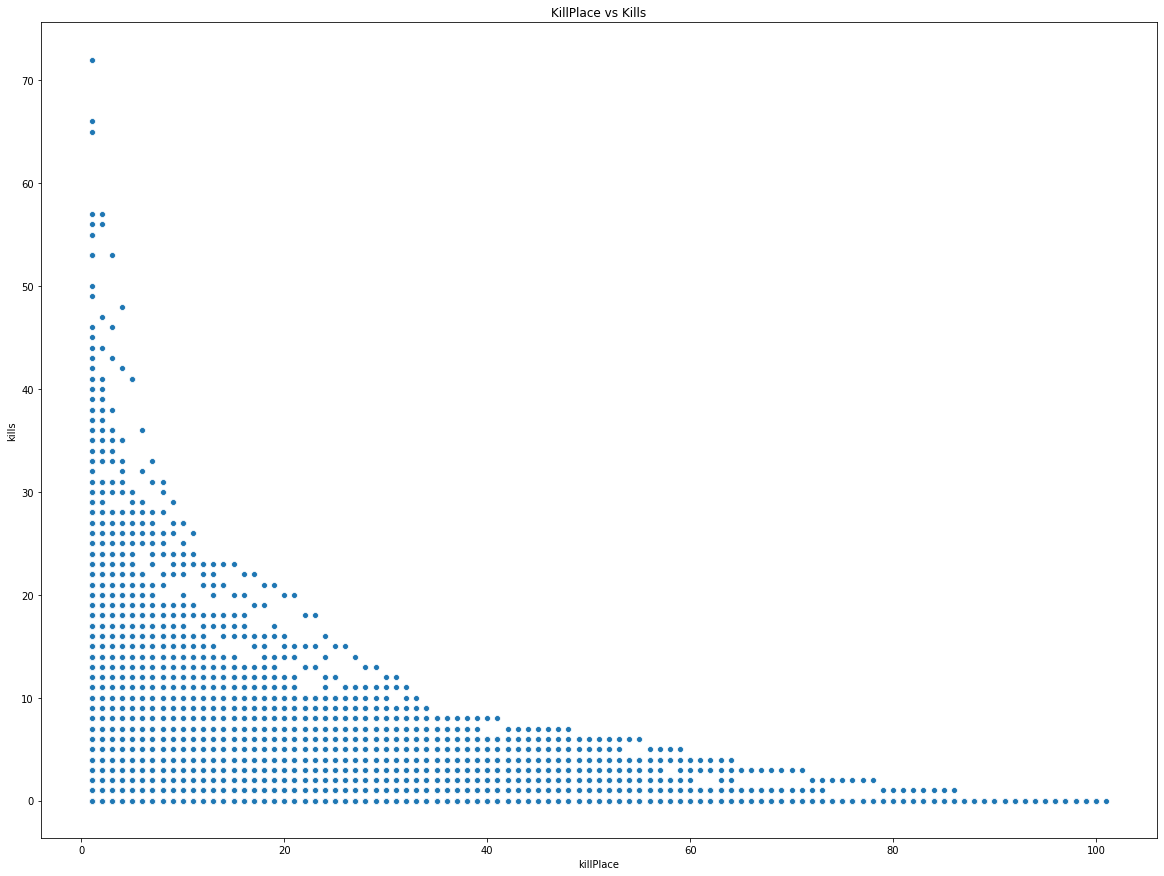

In [18]:
plot_scatters("killPlace","kills","KillPlace vs Kills")

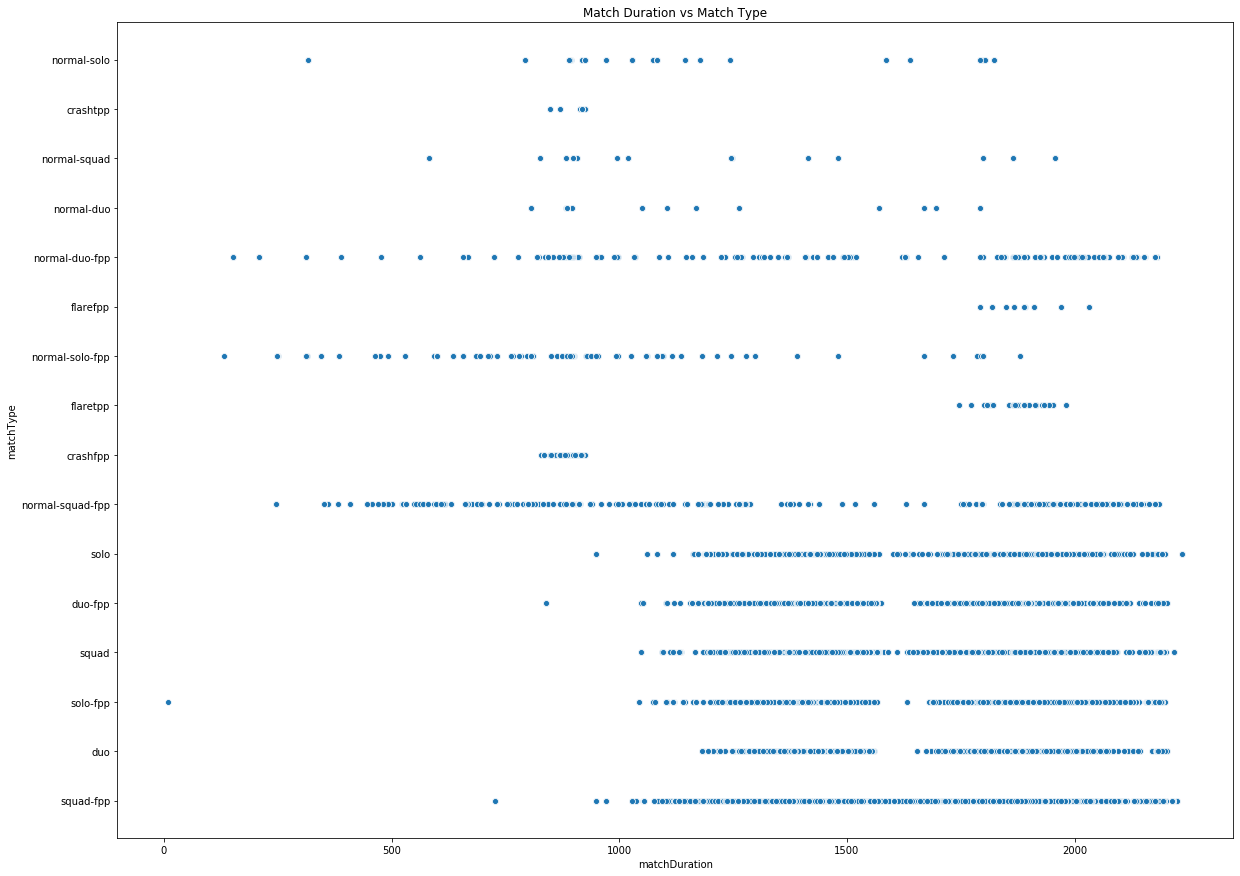

In [19]:
plot_scatters("matchDuration","matchType","Match Duration vs Match Type")

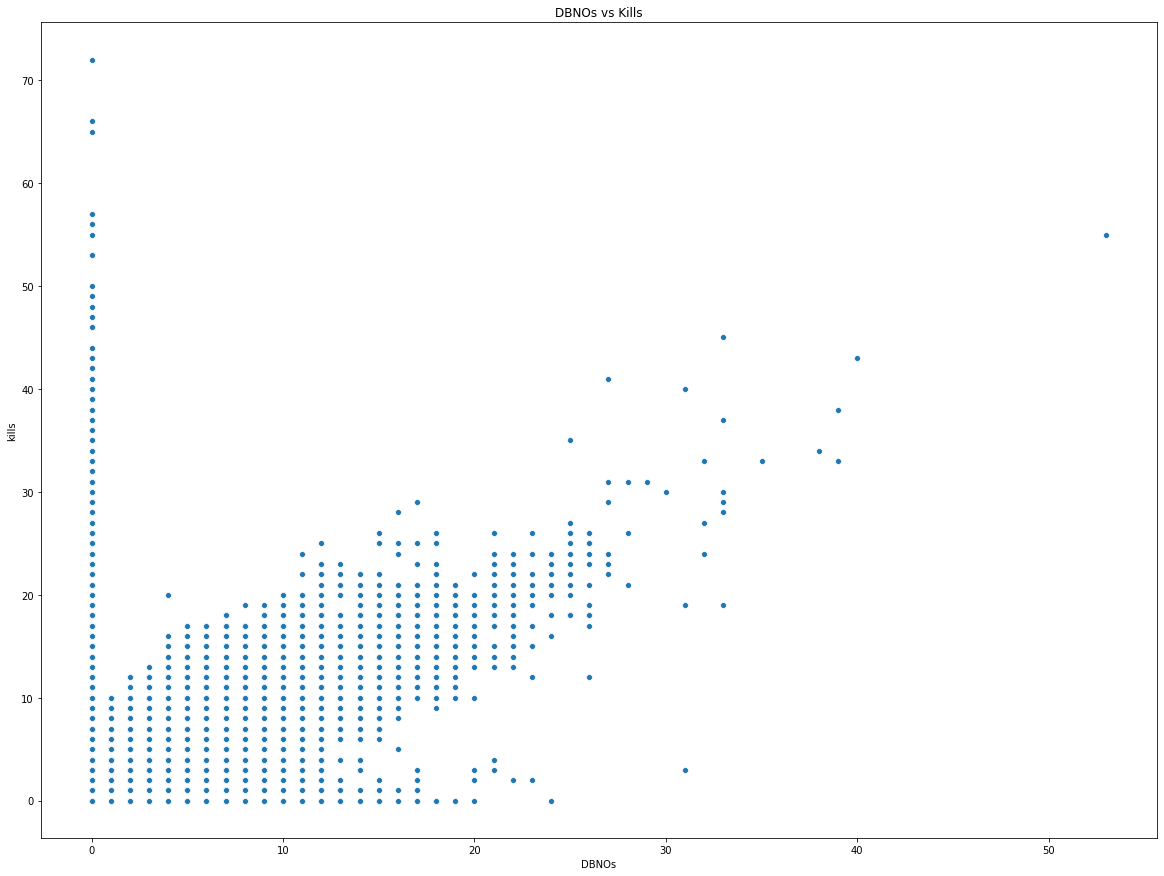

In [20]:
plot_scatters("DBNOs","kills","DBNOs vs Kills")

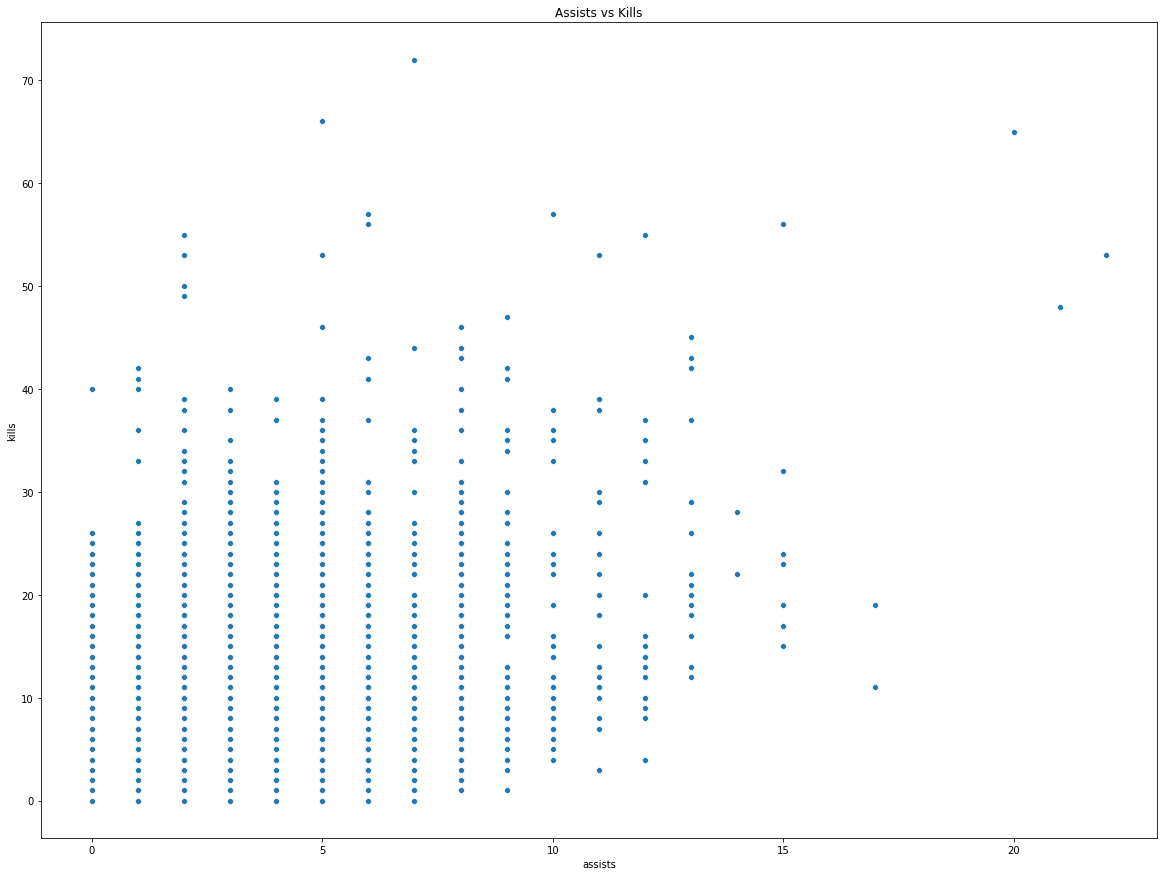

In [21]:
plot_scatters("assists","kills","Assists vs Kills")

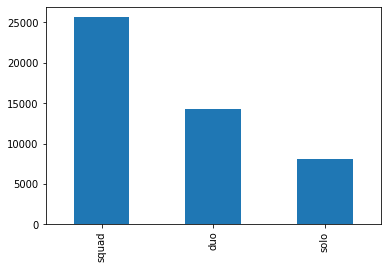

In [16]:
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
d['matchType'] = d['matchType'].apply(mapper)
d.groupby('matchId')['matchType'].first().value_counts().plot.bar()

In [17]:
df = pd.get_dummies(d['matchType'])

In [18]:
res = pd.concat([d, df], axis=1, sort=False)

In [19]:
len(res.columns)

40

In [50]:
res = res.drop(['Id','groupId','matchId','matchType',"DBNO_over_kills","teamkills_over_kills","teamKills","walkdist_over_kills","revives_over_kills"], axis=1)

In [21]:
res.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc',
       'headshotKills_over_kills', 'killPlace_over_maxPlace', 'teamwork',
       'total_distance', 'duo', 'solo', 'squad'],
      dtype='object')

In [22]:
res = res.dropna()

In [23]:
res.columns.to_series()[np.isinf(res).any()]

Series([], dtype: object)

In [24]:
m = d[d.columns.difference(['winPlacePerc'])]
n = d['winPlacePerc']

In [27]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(m, n, test_size=0.4)

In [30]:
print(X.shape, y.shape)

(2668179, 36) (2668179,)


In [ ]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,30)
print(str(len(cor_feature)), 'selected features')

/Users/mastermind/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2445: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import utils
X_norm = MinMaxScaler().fit_transform(X)
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

print(utils.multiclass.type_of_target(y))
print(utils.multiclass.type_of_target(y.astype('int')))
print(utils.multiclass.type_of_target(encoded))

continuous
binary
multiclass


In [34]:
!pip install lightgbm

     |████████████████████████████████| 686kB 5.1MB/s eta 0:00:01


In [39]:
X.head()

,DBNO_over_kills,DBNOs,Id,assists,boosts,damageDealt,groupId,headshotKills,headshotKills_over_kills,heals,...,swimDistance,teamKills,teamkills_over_kills,teamwork,total_distance,vehicleDestroys,walkDistance,walkdist_over_kills,weaponsAcquired,winPoints
44818,0.0,0,322cd10f322d4b,1,3,179.60,11042450d7bcac,0,0.0,1,...,409.5,0,0.0,1,6488.5,0,2790.0,inf,2,0
3142061,0.0,0,7fcfdde8e6aaef,0,0,18.72,c45520580fed30,0,0.0,0,...,0.0,0,0.0,0,69.2,0,69.2,inf,1,0
2248408,0.6,3,0deca7e811f5d4,2,2,374.40,e523398ea4c6a0,1,0.2,3,...,0.0,0,0.0,2,5849.0,0,3931.0,786.2,5,0
3049345,0.0,0,5126f4281d409b,0,0,0.00,9143a9c4627628,0,0.0,0,...,0.0,0,0.0,0,726.3,0,358.7,inf,5,0
1281927,0.0,0,b58ce17a8d0900,0,0,0.00,a999b44f9532ee,0,0.0,0,...,0.0,0,0.0,0,1379.0,0,1379.0,inf,3,1598


In [41]:
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import minmax_scale
import lightgbm as lgb

params={'learning_rate': 0.05,
        'objective':'mae',
        'metric':'mae',
        'num_leaves': 128,
        'verbose': 1,
        'random_state':42,
        'bagging_fraction': 0.7,
        'feature_fraction': 0.7
       }

In [42]:
reg = lgb.LGBMRegressor(**params, n_estimators=10000)
reg.fit(X, y)

LGBMRegressor(bagging_fraction=0.7, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              metric='mae', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=128,
              objective='mae', random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0, verbose=1)

In [51]:
print(X.shape, X_test.shape)

(2668179, 27) (1778787, 27)


In [52]:
pred = reg.predict(X_test, num_iteration=reg.best_iteration_)

In [56]:
feature_importance = reg.feature_importances_
feature_importance = 100.0 *(feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[len(feature_importance) - 30:]
pos = np.arange(sorted_idx.shape[0]) + .5

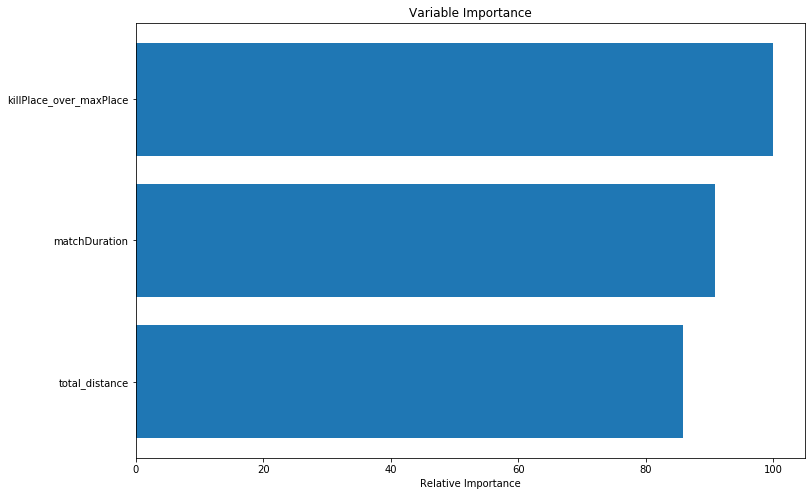

In [57]:
plt.figure(figsize=(12,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [64]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(reg,pred)

TypeError: Expected sequence or array-like, got estimator LGBMRegressor(bagging_fraction=0.7, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              metric='mae', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=128,
              objective='mae', random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0, verbose=1)